## pdf and CDF

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:

df = pd.read_csv('Placement.csv')
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [3]:
# fillna values in salary column
# The correct way to check for NaN values in a pandas Series is using .isna() or .isnull()
df_salary_empty = df.fillna(df['salary'].isna())
df_salary_empty = df.fillna(df['salary'].mean())
df_salary_empty.isna().sum()

sl_no             0
gender            0
ssc_p             0
ssc_b             0
hsc_p             0
hsc_b             0
hsc_s             0
degree_p          0
degree_t          0
workex            0
etest_p           0
specialisation    0
mba_p             0
status            0
salary            0
dtype: int64

In [4]:

df["salary"].replace('NaN', np.nan, inplace=True)

# filter salary column where salary is empty
df_salary_empty = df[df['salary'].isna()]
df_salary_empty

/var/folders/h3/4zbm2_gs3kvcp1xbhzzbl3zh0000gp/T/ipykernel_68703/1105174711.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["salary"].replace('NaN', np.nan, inplace=True)


,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
3,4,M,56.0,Central,52.0,Central,Science,52.00,Sci&Tech,No,66.00,Mkt&HR,59.43,Not Placed,NaN
5,6,M,55.0,Others,49.8,Others,Science,67.25,Sci&Tech,Yes,55.00,Mkt&Fin,51.58,Not Placed,NaN
6,7,F,46.0,Others,49.2,Others,Commerce,79.00,Comm&Mgmt,No,74.28,Mkt&Fin,53.29,Not Placed,NaN
9,10,M,58.0,Central,70.0,Central,Commerce,61.00,Comm&Mgmt,No,54.00,Mkt&Fin,52.21,Not Placed,NaN
12,13,F,47.0,Central,55.0,Others,Science,65.00,Comm&Mgmt,No,62.00,Mkt&HR,65.04,Not Placed,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198,199,F,67.0,Central,70.0,Central,Commerce,65.00,Others,No,88.00,Mkt&HR,71.96,Not Placed,NaN
201,202,M,54.2,Central,63.0,Others,Science,58.00,Comm&Mgmt,No,79.00,Mkt&HR,58.44,Not Placed,NaN
206,207,M,41.0,Central,42.0,Central,Science,60.00,Comm&Mgmt,No,97.00,Mkt&Fin,53.39,Not Placed,NaN
208,209,F,43.0,Central,60.0,Others,Science,65.00,Comm&Mgmt,No,92.66,Mkt&HR,62.92,Not Placed,NaN


In [5]:
from matplotlib import pyplot
from scipy import stats
import seaborn as sns
from scipy.stats import norm

def get_pdf_probablity(dataset, startrange, endrange):
   
    sns.distplot(dataset, kde=True, kde_kws={'color': 'blue'}, color='Green')
    pyplot.axvline(x=startrange, color='red')
    pyplot.axvline(x=endrange, color='red')
    
    sample = dataset
    sample_mean = np.mean(sample)
    sample_std = np.std(sample)
    
    #define the normal distribution
    dist = norm(loc=sample_mean, scale=sample_std)
    
    # sample probability for a range of outcomes
    values = [value for value in range(startrange, endrange)]
    probabilities = [dist.pdf(value) for value in values]
    prob = sum(probabilities)
    print('The area between rannge {} and {} is {:.4f}'.format(startrange, endrange, prob))
  
    return probabilities  




The area between rannge 60 and 70 is 0.3457


/var/folders/h3/4zbm2_gs3kvcp1xbhzzbl3zh0000gp/T/ipykernel_68703/2226298529.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset, kde=True, kde_kws={'color': 'blue'}, color='Green')


[np.float64(0.029386042086908985),
 np.float64(0.031150378399277028),
 np.float64(0.03273886039640231),
 np.float64(0.034114718379285584),
 np.float64(0.03524504131433792),
 np.float64(0.036102082850451064),
 np.float64(0.03666439255570902),
 np.float64(0.03691770802900012),
 np.float64(0.036855556098308075),
 np.float64(0.03647952772777091)]

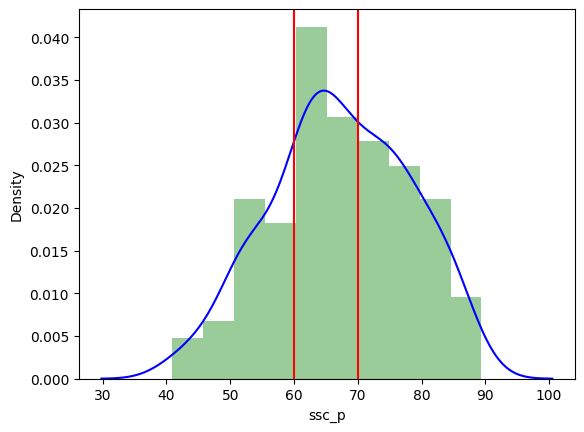

In [6]:
get_pdf_probablity(df['ssc_p'], 60, 70)

In [ ]:
%pip install statsmodels

In [11]:


from statsmodels.distributions.empirical_distribution import ECDF

ecdf = ECDF(df['ssc_p'])

ecdf(90)

np.float64(1.0)